In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import math
import matplotlib.pyplot as plt
import missingno
from plotly.offline import init_notebook_mode,iplot,plot
import plotly.graph_objects as go

In [ ]:
# from zipfile import ZipFile
# zf = ZipFile('ashrae-energy-prediction.zip')
# zf.extractall('content/') 
# zf.close()

In [2]:

train_data = pd.read_csv('/home/joydipb/Documents/CMT307-Coursework-2-Group-19/train.csv')
test_data = pd.read_csv('/home/joydipb/Documents/CMT307-Coursework-2-Group-19/test.csv')

building_data = pd.read_csv('/home/joydipb/Documents/CMT307-Coursework-2-Group-19/building_metadata.csv')

weather_train_data = pd.read_csv('/home/joydipb/Documents/CMT307-Coursework-2-Group-19/weather_train.csv')
weather_test_data = pd.read_csv('/home/joydipb/Documents/CMT307-Coursework-2-Group-19/weather_test.csv')

In [3]:
building_data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [4]:
building_data.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [5]:
building_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [6]:
weather_train_data.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [7]:
weather_train_data.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


In [8]:
weather_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [9]:
weather_test_data.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [10]:
weather_test_data.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,277243.000000,277139.000000,136795.000000,276916.000000,181655.000000,255978.000000,264873.000000,276783.000000
mean,7.484654,14.276863,2.187317,7.487658,1.095395,1016.195762,180.426023,3.548873
std,4.616959,10.741605,2.620627,10.153973,9.163511,7.940392,110.456872,2.317184
min,0.000000,-28.100000,0.000000,-31.600000,-1.000000,972.000000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.600000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.400000,0.000000,1016.300000,190.000000,3.100000
75%,12.000000,22.200000,4.000000,15.000000,0.000000,1020.800000,280.000000,4.600000
max,15.000000,48.300000,9.000000,26.700000,597.000000,1050.100000,360.000000,24.200000


In [11]:
weather_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             277243 non-null  int64  
 1   timestamp           277243 non-null  object 
 2   air_temperature     277139 non-null  float64
 3   cloud_coverage      136795 non-null  float64
 4   dew_temperature     276916 non-null  float64
 5   precip_depth_1_hr   181655 non-null  float64
 6   sea_level_pressure  255978 non-null  float64
 7   wind_direction      264873 non-null  float64
 8   wind_speed          276783 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 19.0+ MB


In [12]:
train_data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [13]:
train_data.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [15]:
test_data.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [16]:
test_data.describe()

,row_id,building_id,meter
count,4.169760e+07,4.169760e+07,4.169760e+07
mean,2.084880e+07,8.075824e+02,6.642857e-01
std,1.203706e+07,4.297680e+02,9.278067e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.042440e+07,4.047500e+02,0.000000e+00
50%,2.084880e+07,9.000000e+02,0.000000e+00
75%,3.127320e+07,1.194250e+03,1.000000e+00
max,4.169760e+07,1.448000e+03,3.000000e+00


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   row_id       int64 
 1   building_id  int64 
 2   meter        int64 
 3   timestamp    object
dtypes: int64(3), object(1)
memory usage: 1.2+ GB


In [18]:
print('Shape of Train Data:',train_data.shape)
print('Shape of Test Data:', test_data.shape)
print('Shape of Building Data:', building_data.shape)
print('Shape of Weather Train Data:', weather_train_data.shape)
print('Shape of Weather Test Data:', weather_test_data.shape)

Shape of Train Data: (20216100, 4)
Shape of Test Data: (41697600, 4)
Shape of Building Data: (1449, 6)
Shape of Weather Train Data: (139773, 9)
Shape of Weather Test Data: (277243, 9)


In [21]:
train_data.to_feather('train_data.feather')
test_data.to_feather('test_data.feather')

building_data.to_feather('building_data.feather')

weather_train_data.to_feather('weather_train_data.feather')
weather_test_data.to_feather('weather_test_data.feather')
train_data = pd.read_feather('train_data.feather')
test_data = pd.read_feather('test_data.feather')

building_data = pd.read_feather('building_data.feather')

weather_train_data = pd.read_feather('weather_train_data.feather')
weather_test_data = pd.read_feather('weather_test_data.feather')

# Reducing the memory usage of the data

In [19]:
def reduce_mem_usage(df, df_name):

    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:

        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2

    print('Memory usage of {} is reduced by {:.2f} %. Usage dropped from {:.2f} MB to {:.2f} MB.'.format(df_name, (100 * (start_mem - end_mem) / start_mem), start_mem, end_mem))
    
    return df

In [20]:
train_data = reduce_mem_usage(train_data, 'Train Data')
test_data = reduce_mem_usage(test_data, 'Test Data')

building_data = reduce_mem_usage(building_data, 'Building Data')

weather_train_data = reduce_mem_usage(weather_train_data, 'Weather Train Data')
weather_test_data = reduce_mem_usage(weather_test_data, 'Weather Test Data')

Memory usage of Train Data is reduced by 71.82 %. Usage dropped from 616.95 MB to 173.84 MB.
Memory usage of Test Data is reduced by 71.82 %. Usage dropped from 1272.51 MB to 358.53 MB.
Memory usage of Building Data is reduced by 73.88 %. Usage dropped from 0.07 MB to 0.02 MB.
Memory usage of Weather Train Data is reduced by 73.06 %. Usage dropped from 9.60 MB to 2.59 MB.
Memory usage of Weather Test Data is reduced by 73.04 %. Usage dropped from 19.04 MB to 5.13 MB.


In [21]:
print('Shape of Train Data:',train_data.shape)
print('Shape of Test Data:', test_data.shape)
print('Shape of Building Data:', building_data.shape)
print('Shape of Weather Train Data:', weather_train_data.shape)
print('Shape of Weather Test Data:', weather_test_data.shape)

Shape of Train Data: (20216100, 4)
Shape of Test Data: (41697600, 4)
Shape of Building Data: (1449, 6)
Shape of Weather Train Data: (139773, 9)
Shape of Weather Test Data: (277243, 9)


# Merging Data

In [22]:
train = train_data.merge(building_data, on='building_id', how='left')
train = train.merge(weather_train_data, on=['site_id', 'timestamp'], how='left')

In [23]:
test = test_data.merge(building_data, on='building_id', how='left')
test = test.merge(weather_test_data, on=['site_id', 'timestamp'], how='left')

In [24]:
print('Shape of Train Data:',train_data.shape)
print('Shape of Test Data:', test_data.shape)
print('Shape of Building Data:', building_data.shape)
print('Shape of Weather Train Data:', weather_train_data.shape)
print('Shape of Weather Test Data:', weather_test_data.shape)

Shape of Train Data: (20216100, 4)
Shape of Test Data: (41697600, 4)
Shape of Building Data: (1449, 6)
Shape of Weather Train Data: (139773, 9)
Shape of Weather Test Data: (277243, 9)


In [25]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [26]:
test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609


In [27]:
print('Shape of Combined Train Data:',train.shape)
print('Shape of Combined Test Data:', test.shape)

Shape of Combined Train Data: (20216100, 16)
Shape of Combined Test Data: (41697600, 16)


Check null values


In [28]:
train.isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

In [29]:
test.isnull().sum()

row_id                       0
building_id                  0
meter                        0
timestamp                    0
site_id                      0
primary_use                  0
square_feet                  0
year_built            24598080
floor_count           34444320
air_temperature         221901
cloud_coverage        19542180
dew_temperature         260799
precip_depth_1_hr      7801563
sea_level_pressure     2516826
wind_direction         2978663
wind_speed              302089
dtype: int64

Visualizing Missing Values in Train and Test data

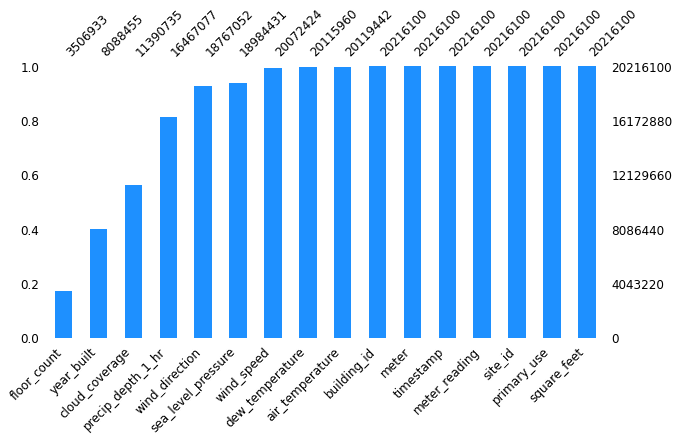

In [30]:
missingno.bar(train, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

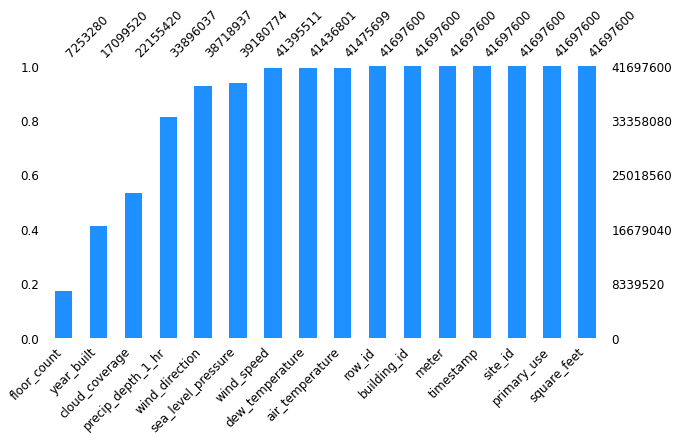

In [31]:
missingno.bar(test, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Breaking Timestamp into Hour, Day, Month, Year
(firstly converts timestamp to date and then breaks down date into 6 new columns: hour, day, dayOfWeek, dayOfYear, month and year)

In [32]:
def breakdown_timestamp(dataframe):
    
    dataframe['timestamp']= pd.to_datetime(dataframe['timestamp'])

    dataframe['hour']= np.uint8(dataframe['timestamp'].dt.hour)
    
    dataframe['day']= np.uint16(dataframe['timestamp'].dt.day)
    dataframe['dayofweek']= np.uint8(dataframe['timestamp'].dt.dayofweek)
    dataframe['dayofyear']= np.uint16(dataframe['timestamp'].dt.dayofyear)

    dataframe['month']= np.uint8(dataframe['timestamp'].dt.month)

    dataframe['year']= np.uint16(dataframe['timestamp'].dt.year)
    
    return dataframe

In [33]:
train = breakdown_timestamp(train)
test = breakdown_timestamp(test)

In [34]:
print('New Shape of Train Data:',train.shape)
print('New Shape of Test Data:', test.shape)

New Shape of Train Data: (20216100, 22)
New Shape of Test Data: (41697600, 22)


Basic Statistics for Meter Reading (Target Variable)

In [35]:
train["meter_reading"].describe()

count    2.021610e+07
mean     2.117122e+03
std      1.532356e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

In [36]:
def distplot(variable, color):
    global ax
    font_size = 16
    title_size = 20
    plt.rcParams['figure.figsize'] = (18, 10)
    ax = sns.distplot(variable, color = color)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.ylabel('Count ', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title(' Distribution of '+'%s' %variable.name, fontsize = title_size)
    plt.show()

/home/joydipb/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



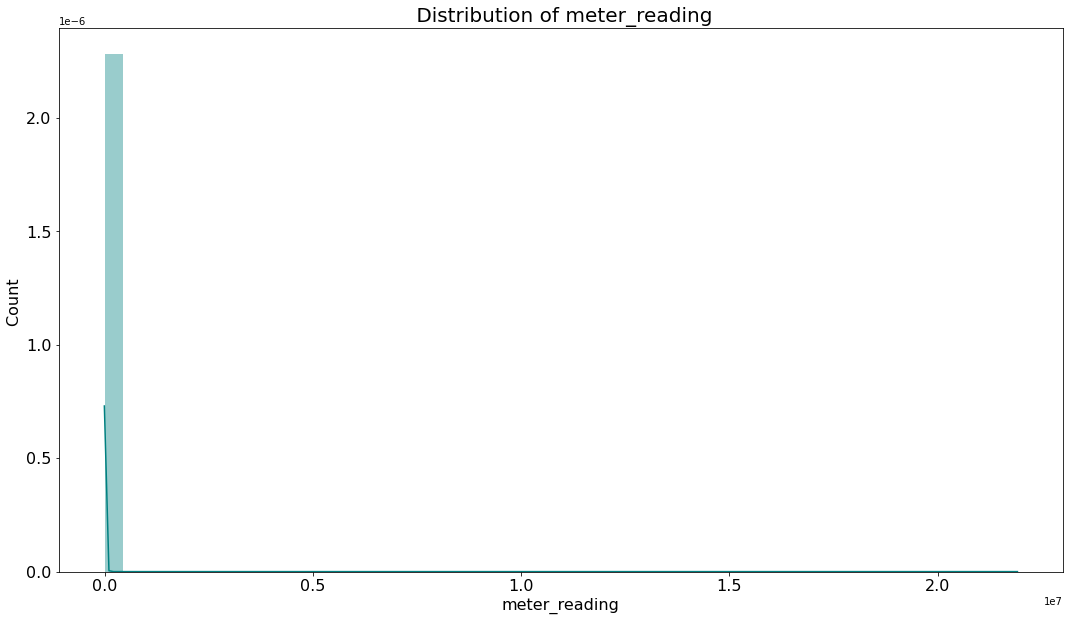

In [37]:
distplot(train['meter_reading'], 'teal')

Meter Reading is skewed to the left, to fix this apply log transformation. 

/home/joydipb/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



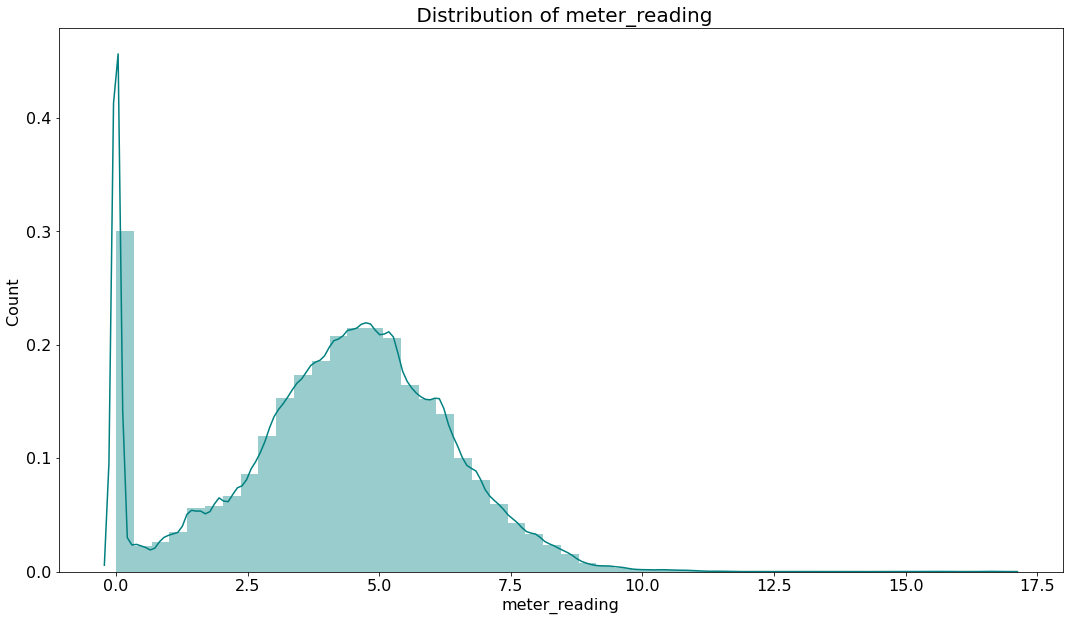

In [38]:
train['meter_reading'] = np.log1p(train['meter_reading'])

plt.title('**Distribution after log tranformation**')
distplot(train['meter_reading'], 'teal')

In [39]:
train['meter_reading'].describe()

count    2.021610e+07
mean     4.145761e+00
std      2.146220e+00
min      0.000000e+00
25%      2.960105e+00
50%      4.379210e+00
75%      5.594652e+00
max      1.690221e+01
Name: meter_reading, dtype: float64

Summary of Meter Reading after log transformation 

In [40]:
train["meter_reading"].describe()

count    2.021610e+07
mean     4.145761e+00
std      2.146220e+00
min      0.000000e+00
25%      2.960105e+00
50%      4.379210e+00
75%      5.594652e+00
max      1.690221e+01
Name: meter_reading, dtype: float64

Meter reading patterns on timely basis and check if there exist any seasonal patterns in our data.

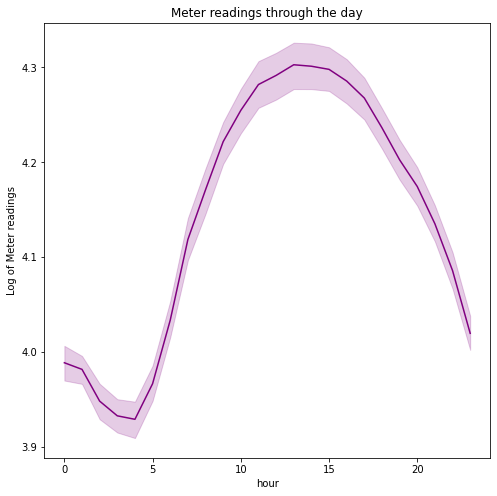

In [41]:
plt.figure(figsize=(8,8))
hour_df= train.groupby(['timestamp','hour']).meter_reading.mean().reset_index()
sns.lineplot(x=hour_df['hour'], y=hour_df['meter_reading'], color='purple')
plt.ylabel("Log of Meter readings")
plt.title("Meter readings through the day")
plt.show()

Daily Meter readings

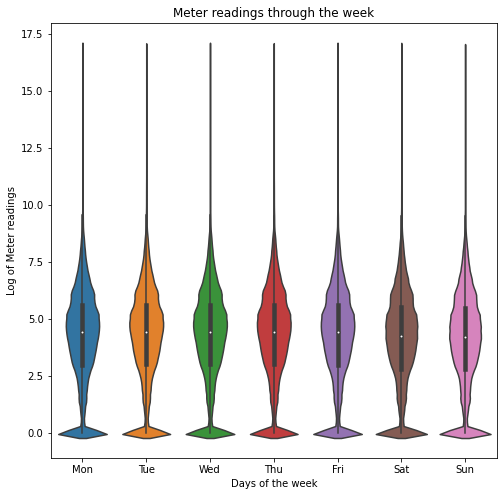

In [42]:
plt.figure(figsize=(8,8))
day_labels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
p=sns.violinplot(x=train['dayofweek'], y=train['meter_reading'], pallete='muted')
p.set_xticklabels(day_labels)
plt.xlabel("Days of the week")
plt.ylabel("Log of Meter readings")
plt.title("Meter readings through the week")
plt.show()

Monthly Meter readings

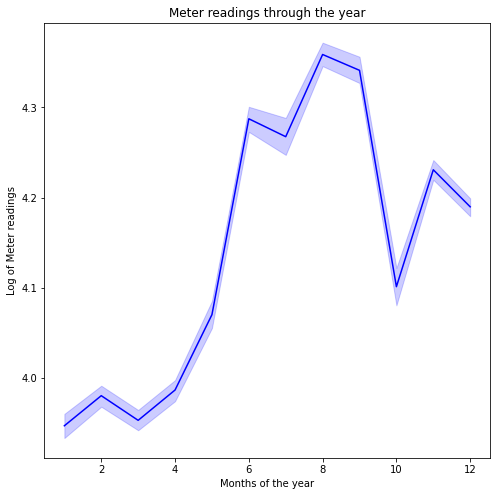

In [43]:
plt.figure(figsize=(8,8))
month= train.groupby(['timestamp','month']).meter_reading.mean().reset_index()
sns.lineplot(x=month['month'], y=month['meter_reading'], color='blue')
plt.xlabel("Months of the year")
plt.ylabel("Log of Meter readings")
plt.title("Meter readings through the year")
plt.show()

In [44]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,dayofweek,dayofyear,month,year
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016


Meter types and their distribution

In [45]:
train['meter'].replace({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}, inplace=True)
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,dayofweek,dayofyear,month,year
0,0,electricity,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
1,1,electricity,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
2,2,electricity,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
3,3,electricity,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
4,4,electricity,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016


# Count Plot for Meter types 

Most of the readings for the electricity meter types followed by chilledwater. It means most of the buildings have electricity meter types, some buildings use multiple meter types.

In [46]:
trace1 = go.Bar(x=train['meter'].unique(),y=train['meter'].value_counts().values,marker=dict(color="rgb(55, 83, 109)"))
data=trace1
layout = go.Layout(title='Countplot of meter',xaxis=dict(title='Meter'),yaxis=dict(title='Count'),hovermode='closest',width=600,height=600)
figure = go.Figure(data=data,layout=layout)
iplot(figure)

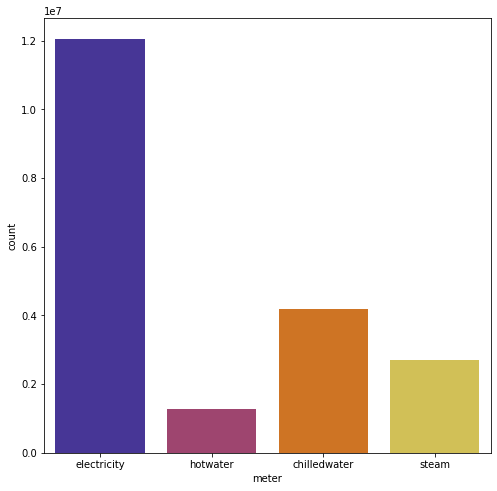

In [47]:
plt.figure(figsize=(8,8))
p=sns.countplot(x='meter', data=train,palette = 'CMRmap')

# Average meter reading by meter types

It is evident from the plot that steam meters consume most amount of energy followed by chilledwater. Hotwater meters consume the least amount of energy.

Text(0.5, 1.0, 'Average meter readings by meter types')

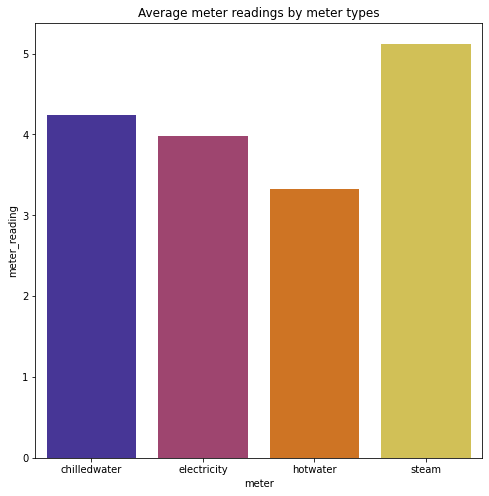

In [48]:
plt.figure(figsize=(8,8))
meter= train.groupby('meter').meter_reading.mean().reset_index()
ax= sns.barplot(x='meter', y='meter_reading', data=meter, palette = 'CMRmap')
plt.title("Average meter readings by meter types")

# Primary usage wise meter reading distribution

In [49]:
trace1 = go.Bar(x=train['primary_use'].unique(),y=train['primary_use'].value_counts().values,marker=dict(color="rgb(55, 83, 109)"))
data=[trace1]
layout = go.Layout(title='Countplot of primary_use variable',xaxis=dict(title='primary_use'),yaxis=dict(title='Count'),hovermode='closest')
figure = go.Figure(data=data,layout=layout)
iplot(figure)

<AxesSubplot:xlabel='count', ylabel='primary_use'>

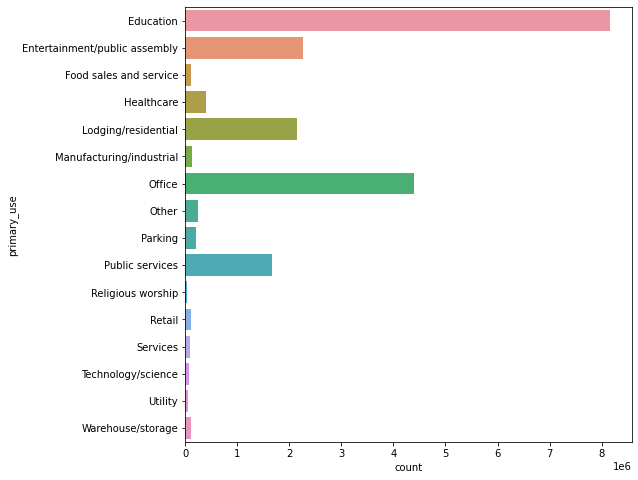

In [50]:
plt.figure(figsize=(8,8))
sns.countplot(y='primary_use', data=train)

Hourly usage varies as per the primary use of the buildings

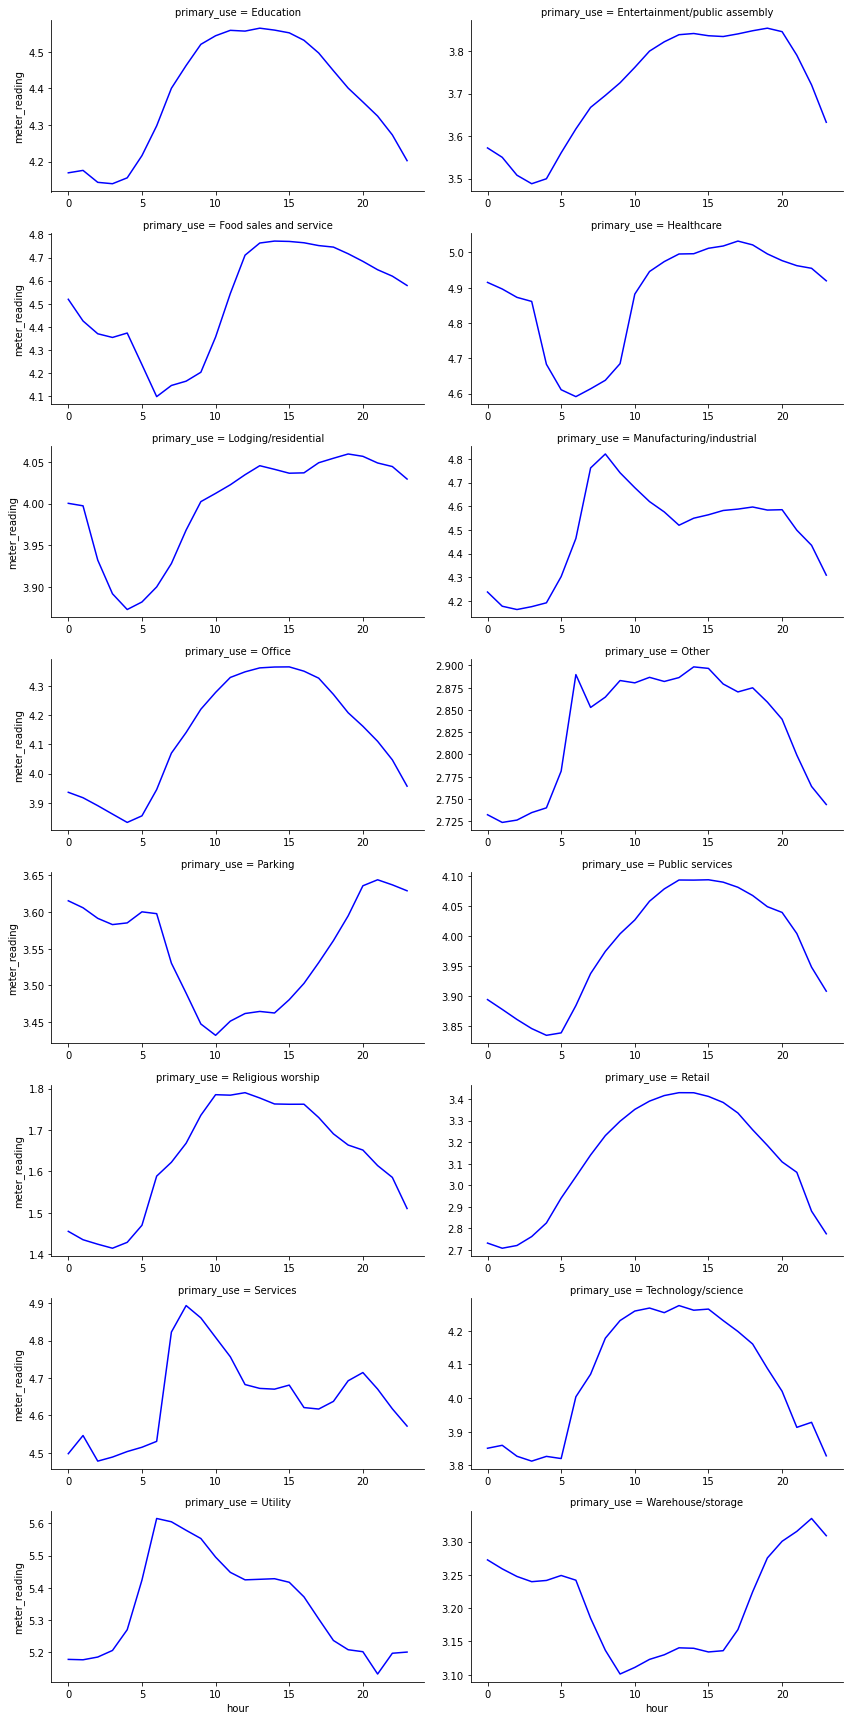

In [51]:
#Hourly average readings based on type of buildings
hour_use_df= train.groupby(['hour', 'primary_use']).meter_reading.mean().reset_index()
p=sns.FacetGrid(hour_use_df, col='primary_use', col_wrap=2, height=3, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'hour', 'meter_reading', color='blue')
plt.show()

In [52]:
train

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,dayofweek,dayofyear,month,year
0,0,electricity,2016-01-01 00:00:00,0.000000,0,Education,7432,2008.0,NaN,25.000000,...,NaN,1019.5,0.0,0.000000,0,1,4,1,1,2016
1,1,electricity,2016-01-01 00:00:00,0.000000,0,Education,2720,2004.0,NaN,25.000000,...,NaN,1019.5,0.0,0.000000,0,1,4,1,1,2016
2,2,electricity,2016-01-01 00:00:00,0.000000,0,Education,5376,1991.0,NaN,25.000000,...,NaN,1019.5,0.0,0.000000,0,1,4,1,1,2016
3,3,electricity,2016-01-01 00:00:00,0.000000,0,Education,23685,2002.0,NaN,25.000000,...,NaN,1019.5,0.0,0.000000,0,1,4,1,1,2016
4,4,electricity,2016-01-01 00:00:00,0.000000,0,Education,116607,1975.0,NaN,25.000000,...,NaN,1019.5,0.0,0.000000,0,1,4,1,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,electricity,2016-12-31 23:00:00,2.277267,15,Entertainment/public assembly,19619,1914.0,NaN,1.700195,...,-1.0,1008.5,180.0,8.796875,23,31,5,366,12,2016
20216096,1445,electricity,2016-12-31 23:00:00,1.762159,15,Education,4298,NaN,NaN,1.700195,...,-1.0,1008.5,180.0,8.796875,23,31,5,366,12,2016
20216097,1446,electricity,2016-12-31 23:00:00,0.000000,15,Entertainment/public assembly,11265,1997.0,NaN,1.700195,...,-1.0,1008.5,180.0,8.796875,23,31,5,366,12,2016
20216098,1447,electricity,2016-12-31 23:00:00,5.078761,15,Lodging/residential,29775,2001.0,NaN,1.700195,...,-1.0,1008.5,180.0,8.796875,23,31,5,366,12,2016


Daily average readings based on type of buildings

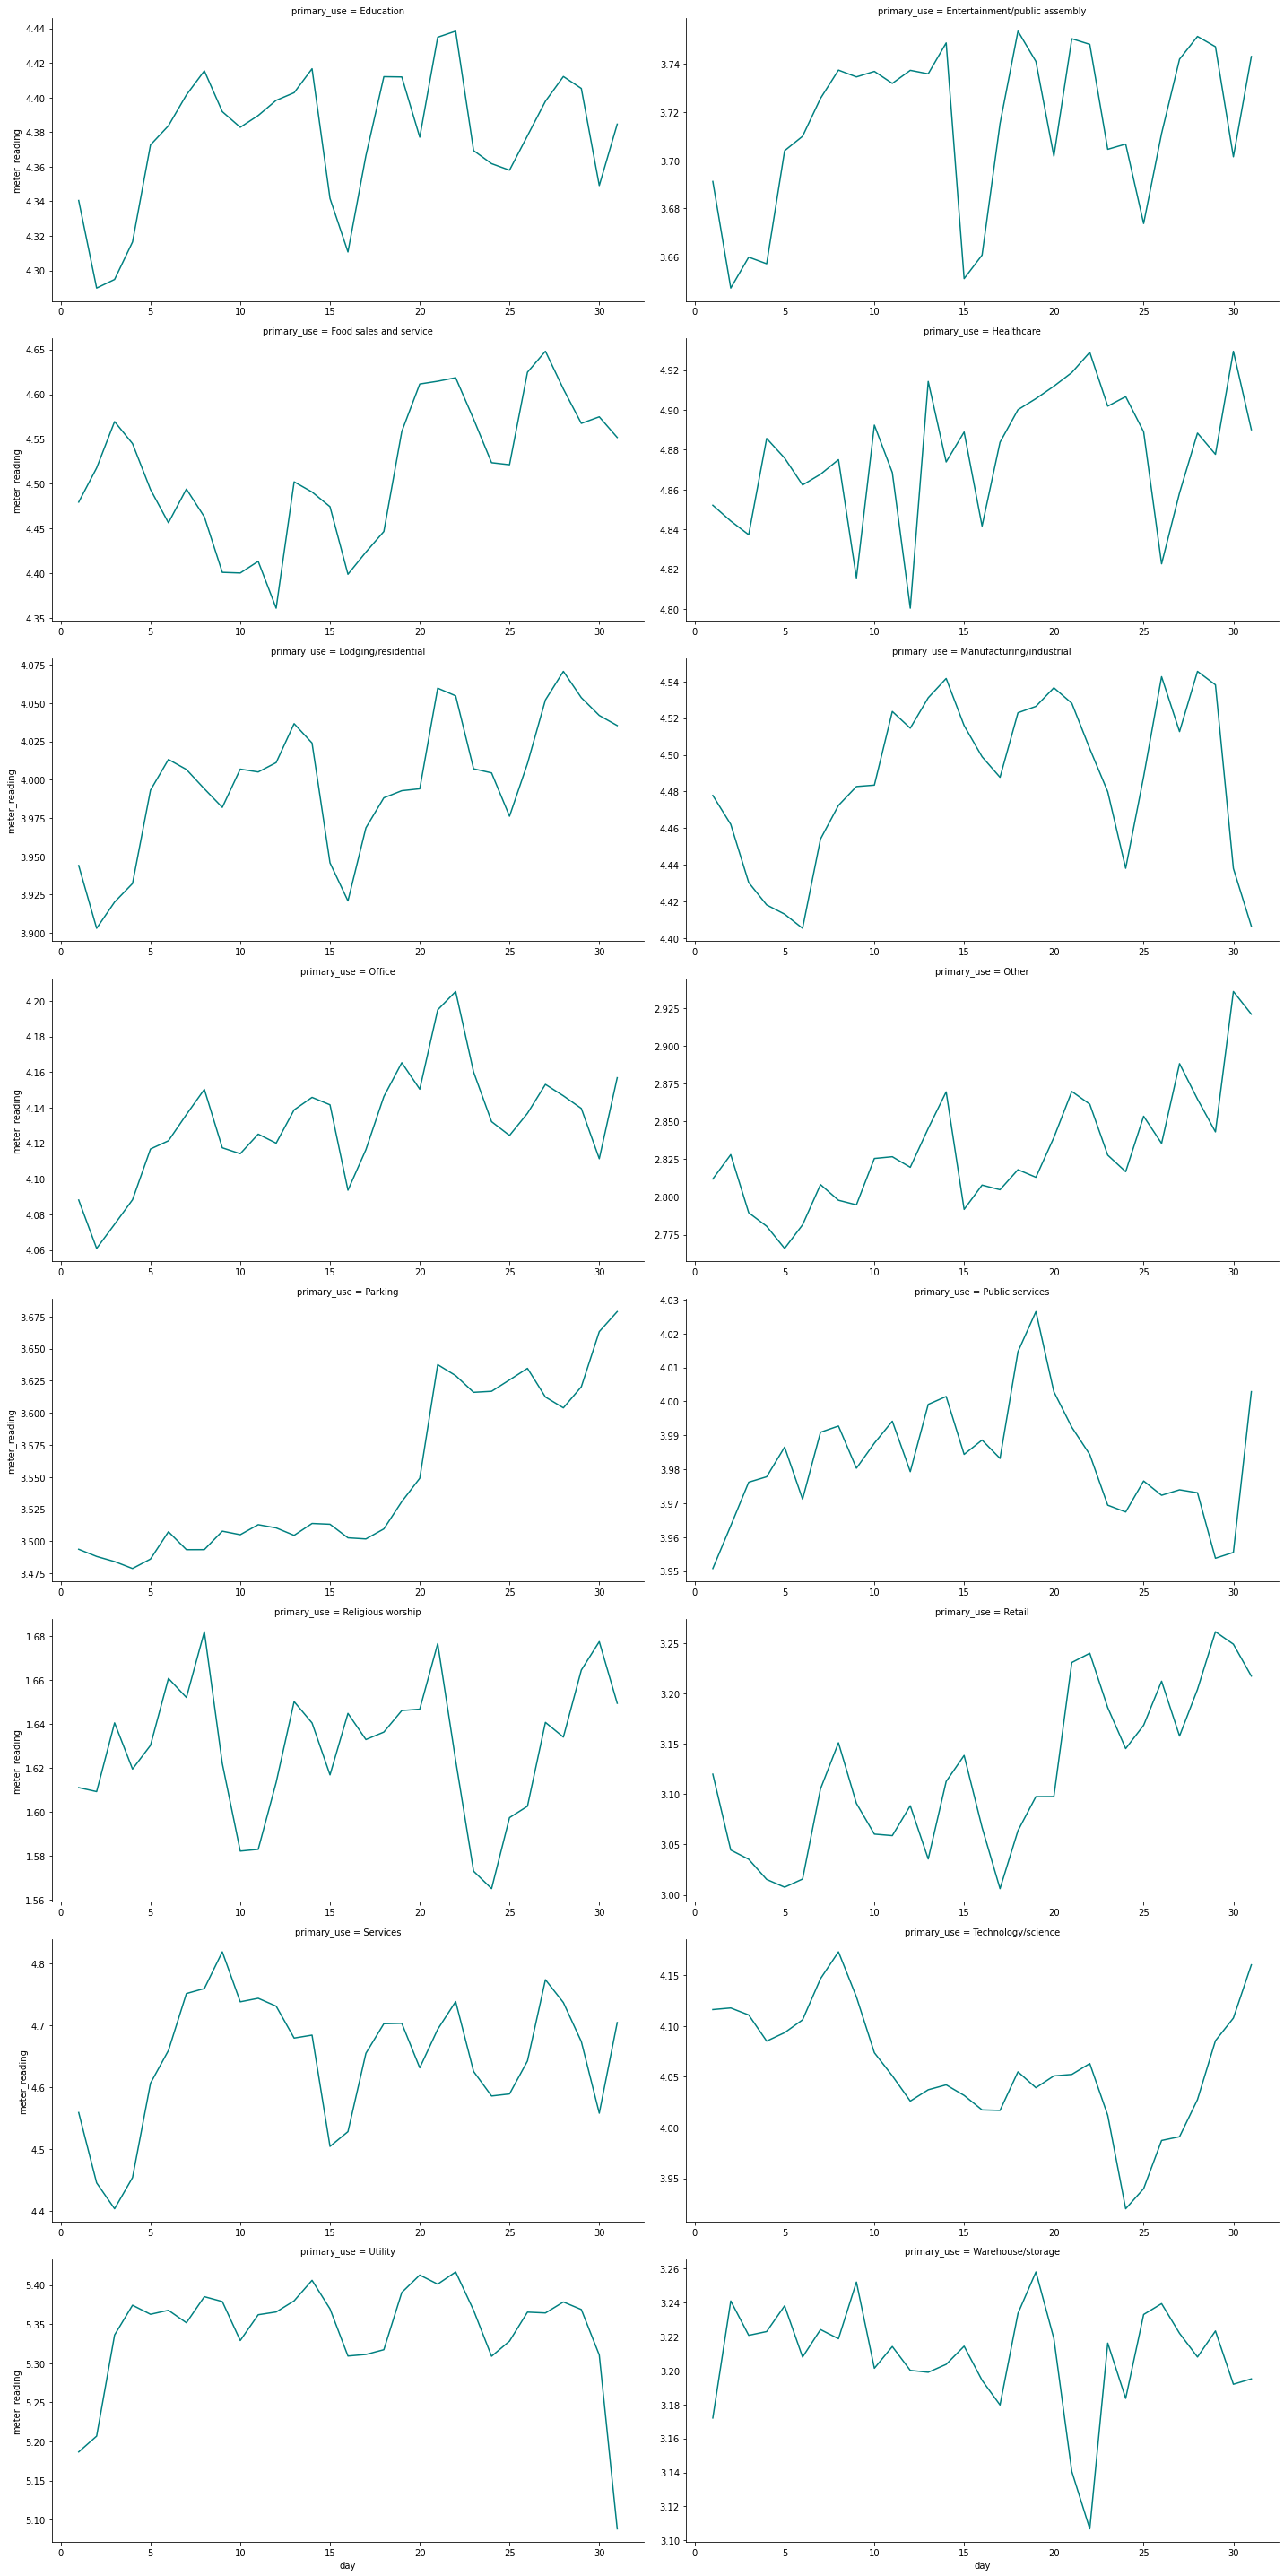

In [53]:

day_use_df= train.groupby(['day', 'primary_use']).meter_reading.mean().reset_index()
p=sns.FacetGrid(day_use_df, col='primary_use', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'day', 'meter_reading', color='teal')
plt.show()

Monthy average readings based on type of buildings

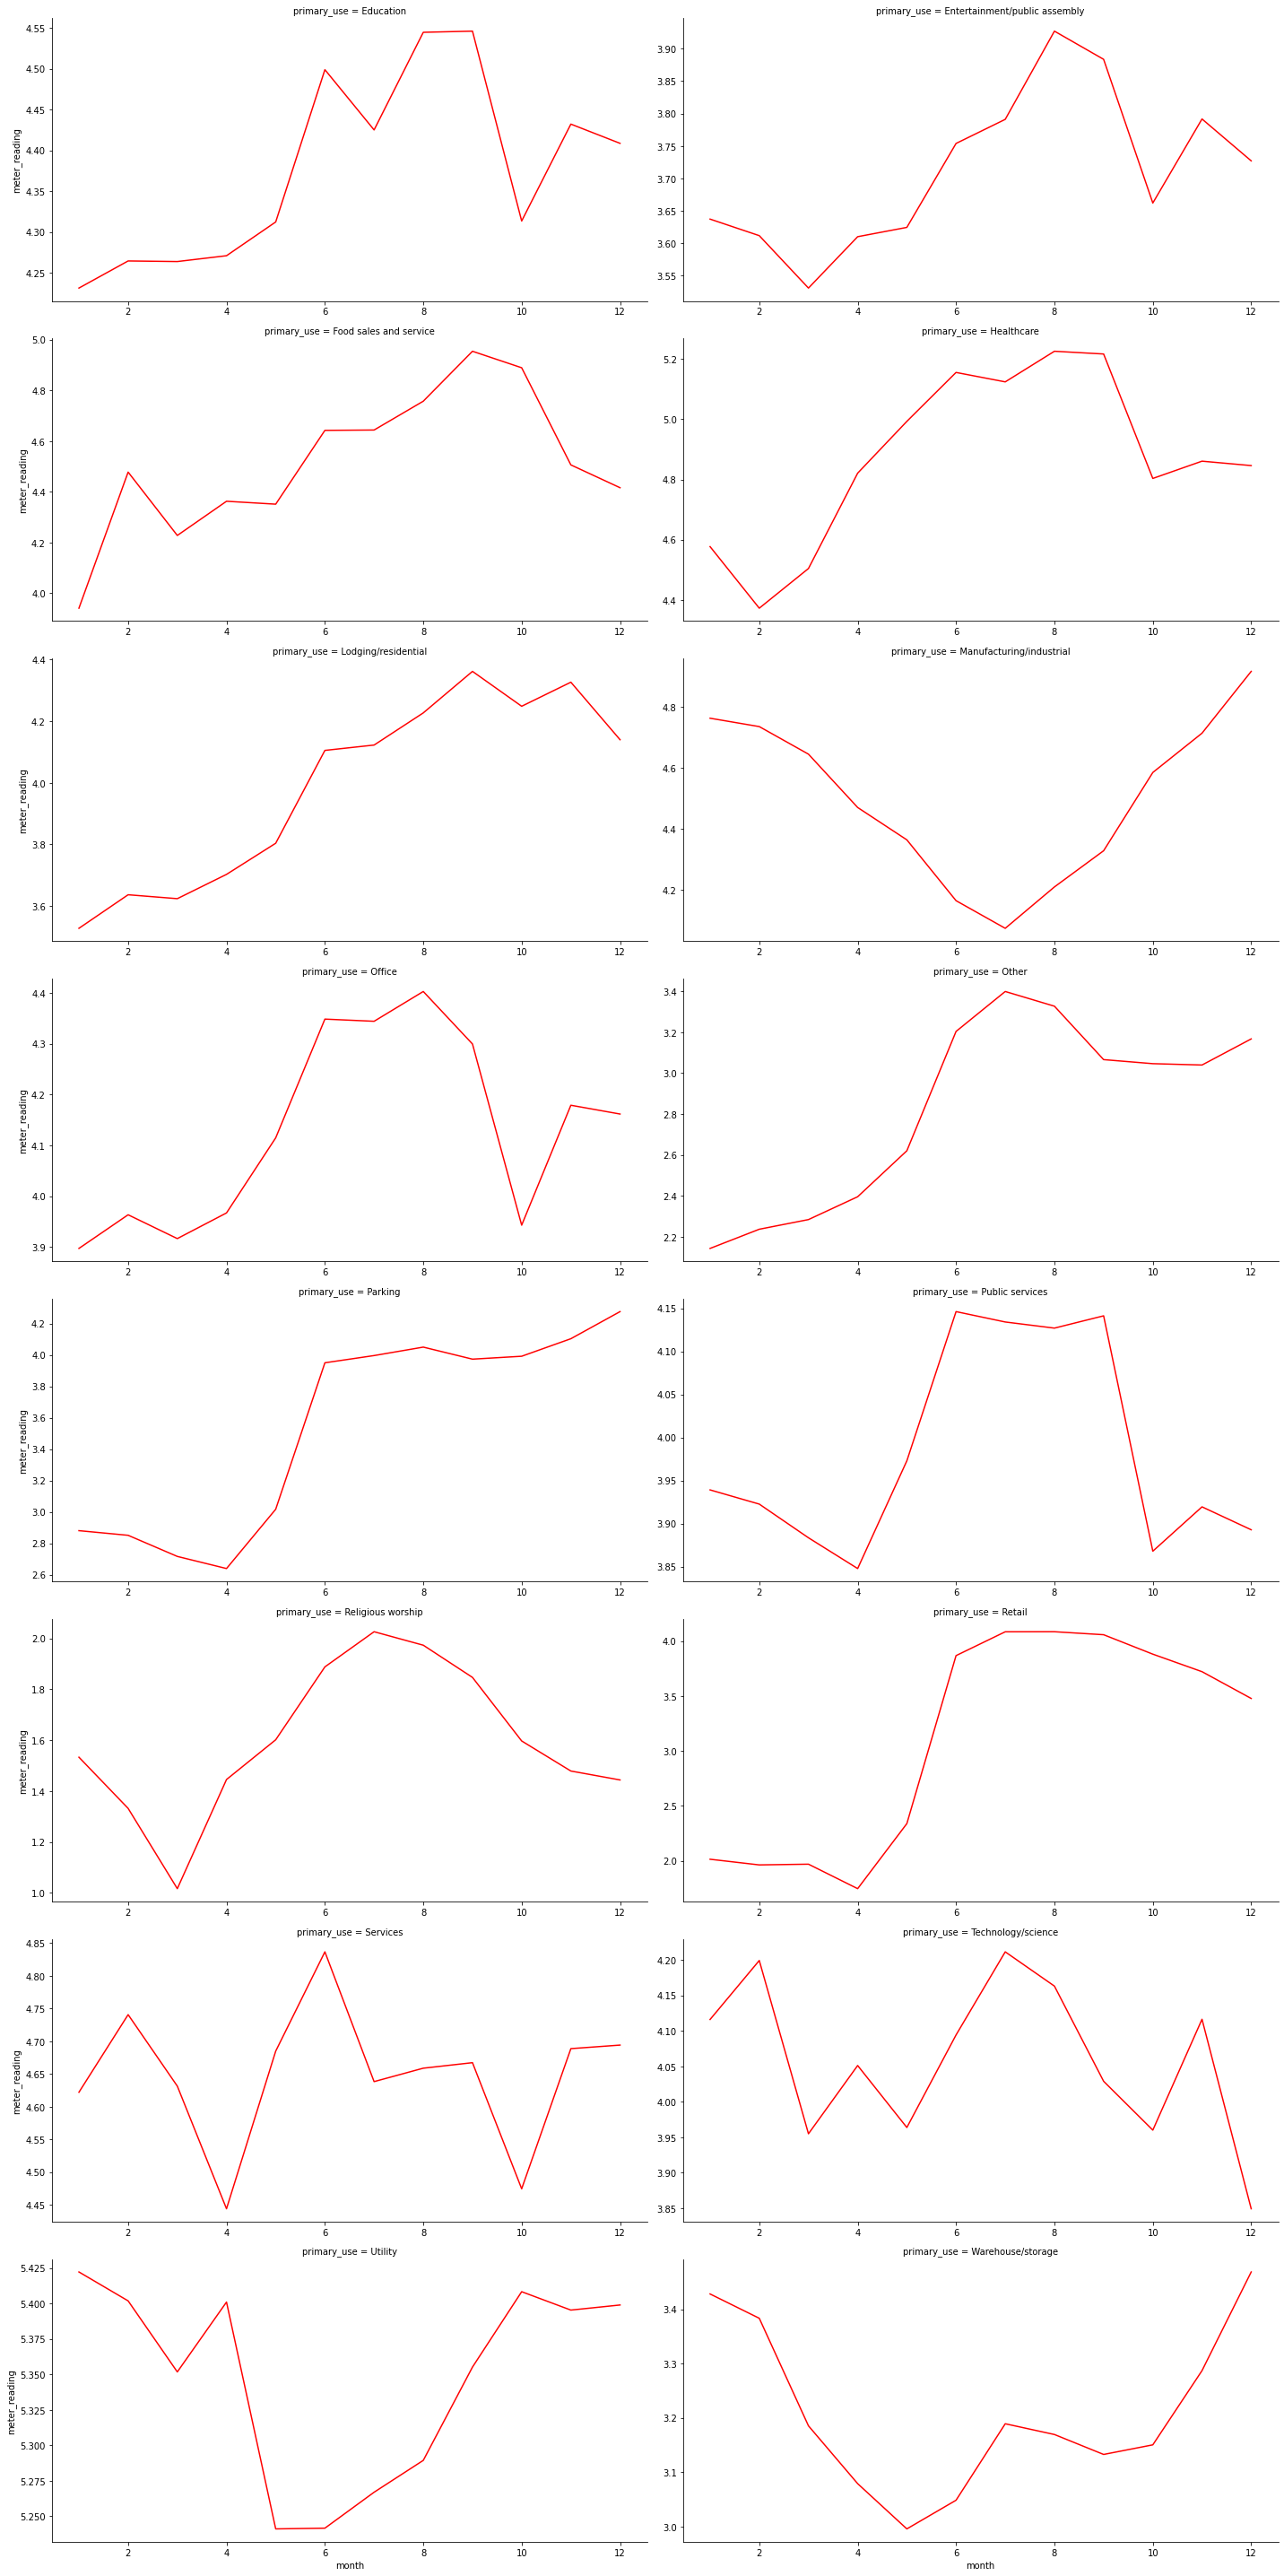

In [54]:

month_use_df= train.groupby(['month', 'primary_use']).meter_reading.mean().reset_index()
p=sns.FacetGrid(month_use_df, col='primary_use', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'month', 'meter_reading', color='red')
plt.show()

# Analysis of weather data

Mean value of air temperature is between 14 and 15 degree celsius

/home/joydipb/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



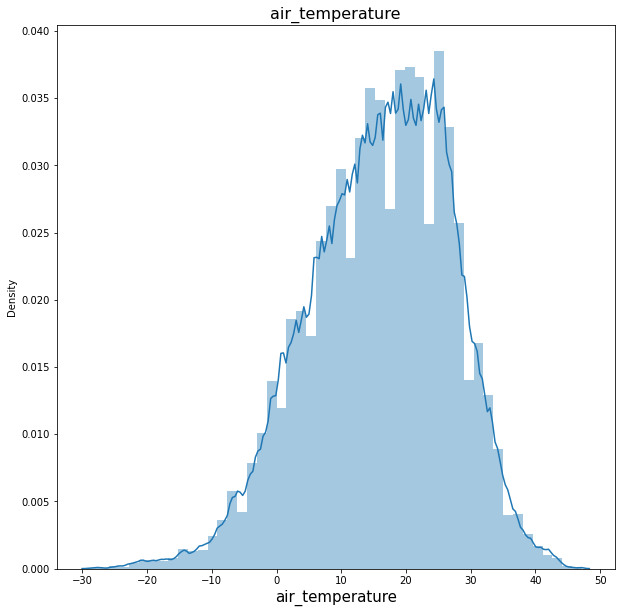

In [55]:
def distant_plot(feature):
    '''plot dist curves for train weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.color_palette("mako", as_cmap=True)
    sns.distplot(train[feature],  ax=ax).set_title(feature, fontsize=16)
    plt.xlabel(feature, fontsize=15)
    plt.show()
distant_plot('air_temperature')

Cloud_coverage is measured between 0 to 9 scale and zero means it is a clear sky and 9 means it is rainy.we observed that most of the cloud coverage is zero.

/home/joydipb/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



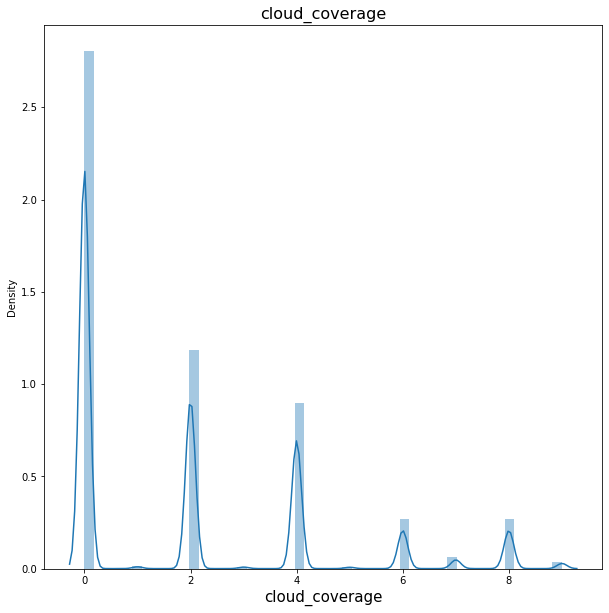

In [56]:
distant_plot('cloud_coverage')

Most of dew temperature in all buildings is around 13 degree celsius.

/home/joydipb/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



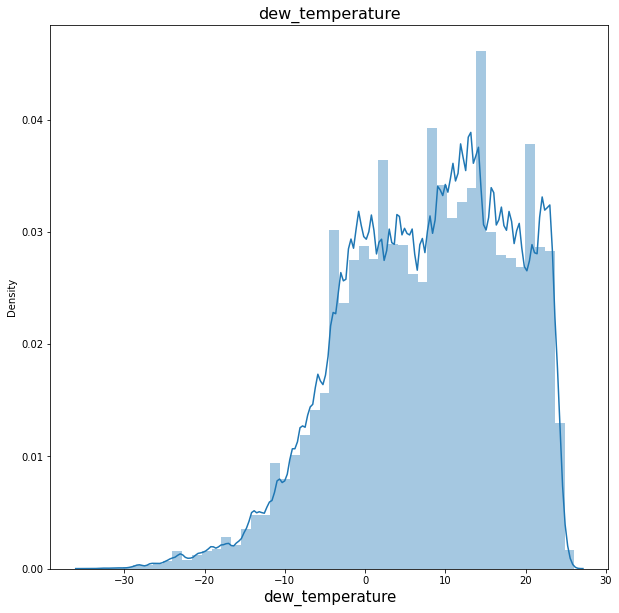

In [57]:
distant_plot('dew_temperature')

Most of sea pressure is around 1019.

/home/joydipb/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



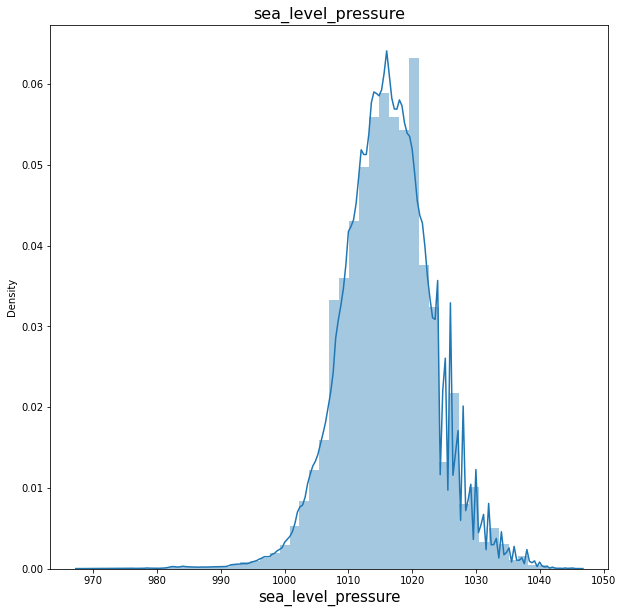

In [58]:
distant_plot('sea_level_pressure')

# Analysing building data

In [59]:
def distant_plott(feature):
    '''plot dist curves for train weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(train[feature], color='y', ax=ax).set_title(feature, fontsize=16)
    plt.xlabel(feature, fontsize=15)
    plt.show()

Distribution plot: Year built


Most of the buildings are around 1975.

/home/joydipb/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



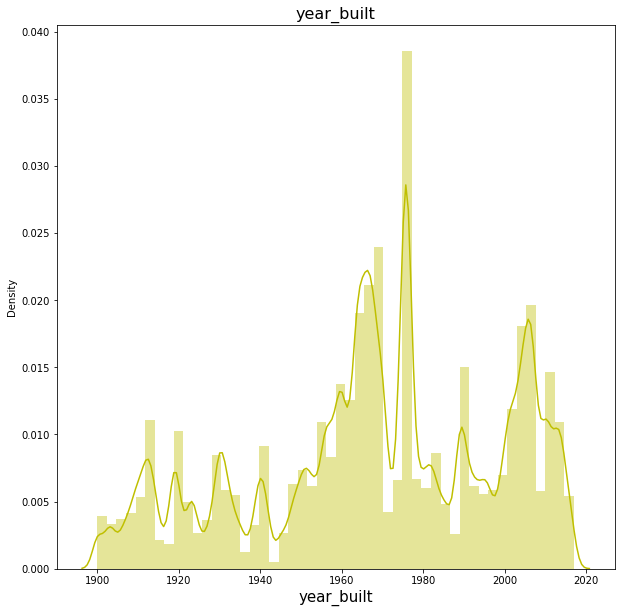

In [60]:
distant_plott('year_built')

Mean meter readings by year built

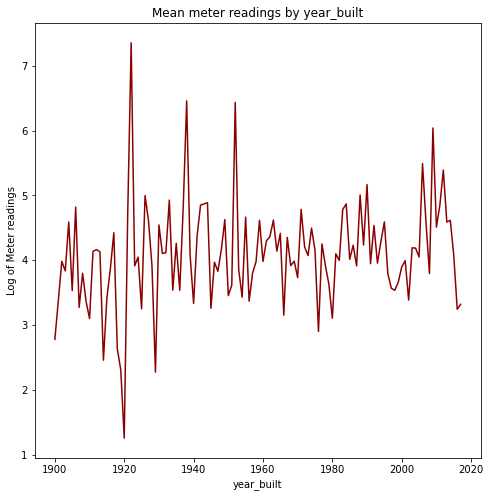

In [61]:
plt.figure(figsize=(8,8))
year_df= train.groupby('year_built').meter_reading.mean().reset_index()
sns.lineplot(x=year_df['year_built'], y=year_df['meter_reading'], color='darkred')
plt.ylabel("Log of Meter readings")
plt.title("Mean meter readings by year_built")
plt.show()

Distribution plot: square feet

/home/joydipb/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



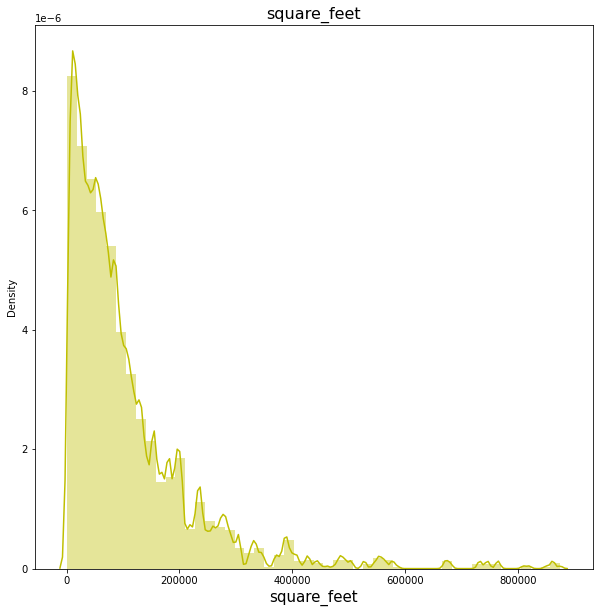

In [62]:
distant_plott('square_feet')

As the square feet is also heavily skewed and the scale of values is also very large hence we will apply a log transformation here and plot the distribution.



In [63]:
train['square_feet']=np.log1p(train['square_feet'])

/home/joydipb/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



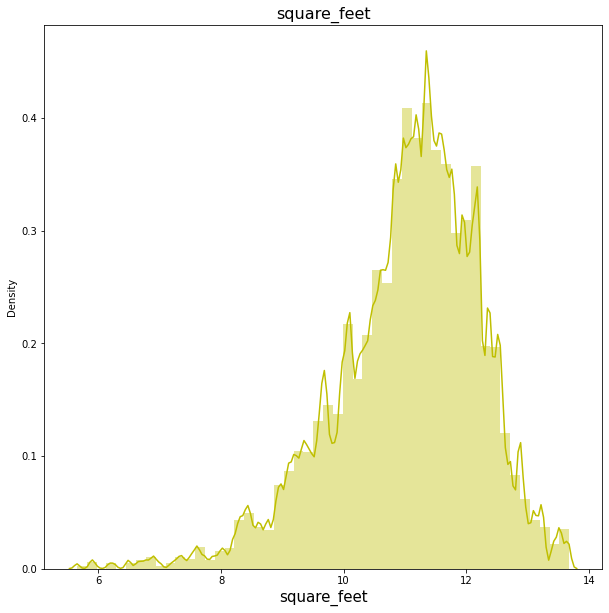

In [64]:
distant_plott('square_feet')

Distribution plot: floor count

Most of the buildings have 2 floors

/home/joydipb/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



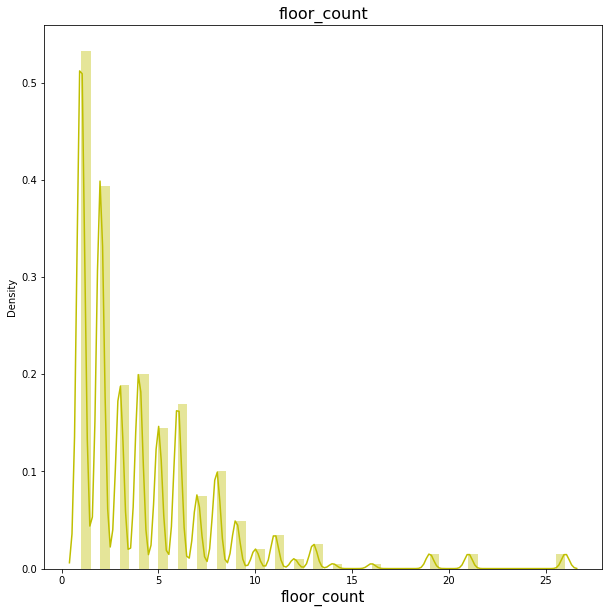

In [65]:
distant_plott('floor_count')

Mean meter readings by floor count

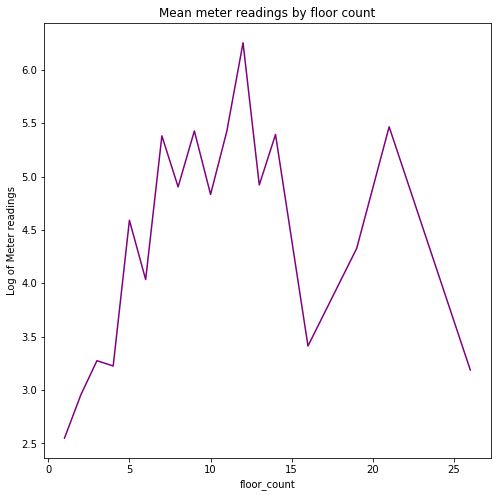

In [66]:
plt.figure(figsize=(8,8))
floor_df= train.groupby('floor_count').meter_reading.mean().reset_index()
sns.lineplot(x=floor_df['floor_count'], y=floor_df['meter_reading'], color='purple')
plt.ylabel("Log of Meter readings")
plt.title("Mean meter readings by floor count")
plt.show()


# Correlation Matrix

<AxesSubplot:>

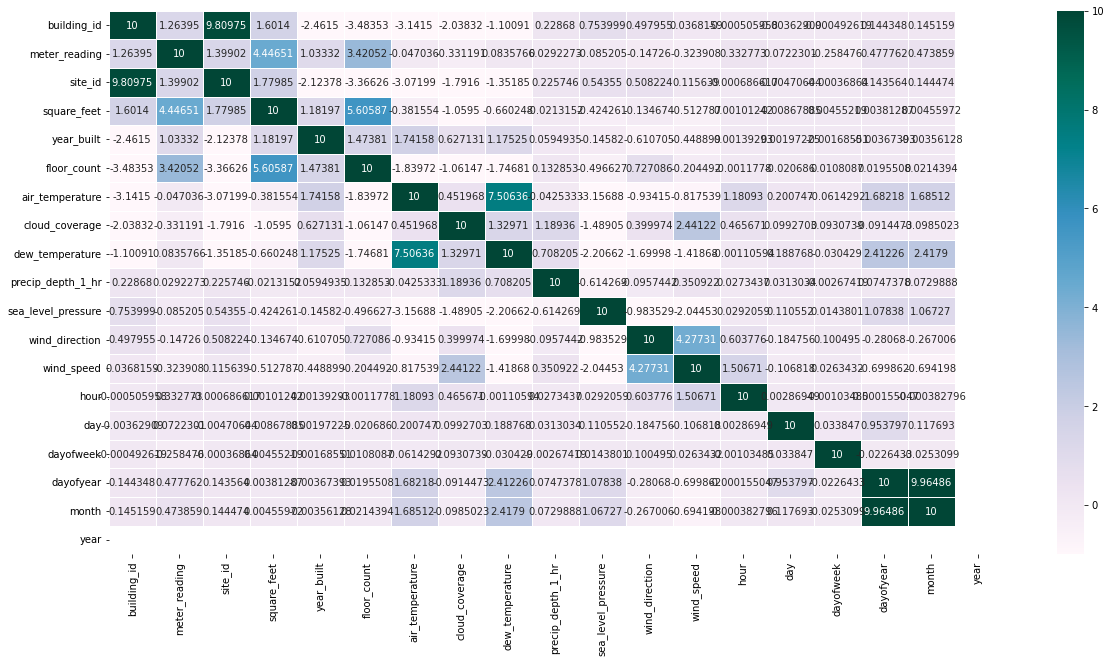

In [67]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(train.corr()*10,vmin=-1,vmax=10,linewidths=1,annot=True,annot_kws={"size": 10},fmt="g",ax=ax,cmap='PuBuGn')

Observation of Correlation Matrix: 



*  Building id is highly correlated with site_id.
*  Air_temperature is highly correlated with dew_temperture.
*  Square_feet is correlated with floor_count.
*   Most of the features are less in correlation with meter reading.
*   Wind speed is in correlation with wind direction and cloud_coverage.













# Windrose Plot for wind direction and speed

This windrose diagram shows that for most of the sites, the wind blows from north direction(90 degrees) most of the time, followed by south direction(270 degrees). It also shows that wind blows the least from NE direction(45 degrees). When the wind blows from the north, maximum of the times the speed is between 0 to 3.8 m/s.

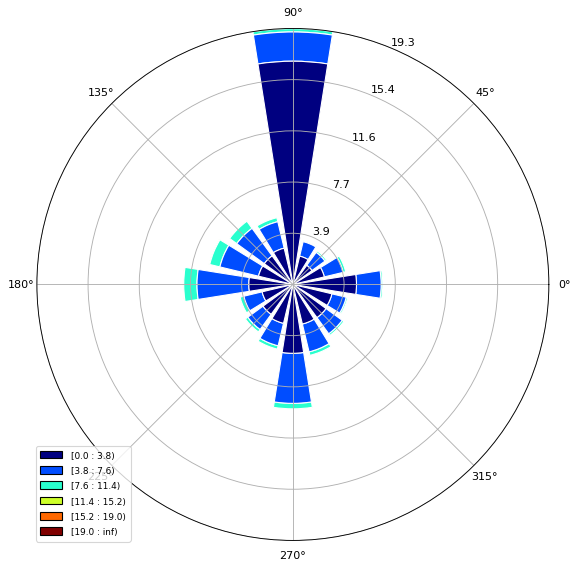

In [69]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(train['wind_direction'], train['wind_speed'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()



In [71]:
import gc
gc.collect()

648